# Assignment 1.4: Polynomial Model

* *Version 1.4: Added division by `n_samples` in gradient expression. Also inserted the transpose back in to the math expression just before the def polynomial_model line.*
* *Version 1.3: Changed 'linear model' to 'polynomial model' when referring to what to plot.*
* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*

#### Suman Bhatta

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

Now implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.  <font color=red>The following expression is now divided by `n_samples`.</font>

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$
\;
* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

## Assignment 1

Import the required python packages

In [635]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

Download air quality data. The air quality data is downloaded in zipped file. Unzip the zipped file to be used by the code

In [636]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0   123k      0  0:00:12  0:00:12 --:--:--  350k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


Read air quality data from unzipped csv file and load into pandas data frame.
Display the shape of pandas data frame.

In [637]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
print("Number of colunn and rows in the data: {}".format(data.shape))

Number of colunn and rows in the data: (827, 15)


Obtain hour of the day (x-axis) data from the csv file. The "hour" data is stored as "Time" column in the pandas data frame.

In [638]:
hour = [int(t[:2]) for t in data['Time']]

Obtain carbon mono-oxide data (CO) from the csv file. The "CO" data will be plotted in the Y-axis of the plot. CO data is stored as "CO(GT)" column in the pandas data frame

In [639]:
CO = data['CO(GT)']

Convert X and Y data to numpy array. DIsplay the shape of X-axis data and Y-axis data

In [640]:
T = CO
T = np.array(T).reshape((-1, 1))  # Make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO data']
X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (827, 1) Xnames = ['Hour']
T.shape = (827, 1) Tnames = ['CO data']


Plot the Air quality data. For this task, only the CO data is ploted against hour of day. (If required other air quality data can be plotted).

X-axis is hour of the day and Y-axis is CO data.

### Plot description
The plot displys the CO content of the atmosphere at various hours of the day. The CO is low duing the early hour (12 AM - 6AM) and it drastically increases from (8AM - 11AM) and again it is high at 6PM to 10PM. This observation might have occured because the vehicle movement is maximum in the morning time and after hours of the day. People go to work and come back from work respectively at these hours. At other times of the day the CO level is relatively low.

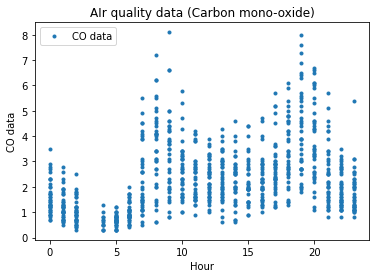

In [641]:
plt.plot(X, T, '.', label = 'CO data')
plt.title("AIr quality data (Carbon mono-oxide)") # Title of the plot
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]) 
plt.legend();


### Polynomial gradient function

The Ploynomial gradient function is the implementation of:

$$\nabla_W E = \nabla_Y E \; \nabla_W Y$$

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$

In python it can be implemented as follow:

    dYdW = X
    dEdY = -2 (T - Y)
    dEdW = dEdY.T @ dYdW
    


In [642]:
# Polynomial gradient function

def dYdW(X, T, W):
    # Enumerate rows in W
    n_powers = range(W.shape[0])

    # Find X powers
    dydw = X**[n_powers]

    # Return column vector
    return(dydw)

def dEdY(X, T, W):
    Y = polynomial_model(X, W)
    return (-2 * (T - Y))
    
def polynomial_gradient(X, T, W):
    result = dEdY(X, T, W).T @ dYdW(X, T, W) / (X.shape[0])
    return result.T


### The polynomial function 
The polynomial function is the implementation of following function.
For this task we are fitting the data to a polynomial function. The function has various weights. If the appropriate weights to the model can be determined then the model can represent the data well.
To determine appropriate weights of the model Gradient Descent Adam function is used in this task.


$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

In [643]:
# Polynominal function

def polynomial_model(X, W):   
    # Enumerate rows in W
    n_powers = range(W.shape[0])

    # Find Xpowers
    # First column will be column of ones, since x^0 is 1
    Xpowers = X**[n_powers]

    pfunction = Xpowers @ W

    # Return the polynominal
    return pfunction


### Gradient Descent Adam (GDA)

This function is used to determine the best weights to the polynomial model.


In [644]:
# Gradient descent adam
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )



### Apply GDA function
Apply the gradient_descent_adam function to find appropriate weights to fit the polynomial function to the given data.

n_powers = 5

For n_power = 5, the polynomial obtained will be of power 4.

For example:

For n_powers = 4, the polynomial obtained is cubic(power 3) polynomial

n_steps = 200 (Number of iterations)


In [645]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01     # learning rate
n_steps = 200  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(
                            rmse(polynomial_model, X, T, W), W[0,0], W[1,0], W[2,0], W[3,0], W[4,0]))


Adam:  Error is 1.63   W is 0.01, 0.01, 0.00, 0.00, -0.00


### Polynomial model over the given data
The data is plotted in blue dots and polynomial is plotted as red over the data.

The polynomial ploted below

Iterations = 200

npowers = 5

We can see from the plot below, that the model tends to fit to the data. The extreme low or high values in the data are however not covered by the model.

The RMSE error after the fit is 1.63.




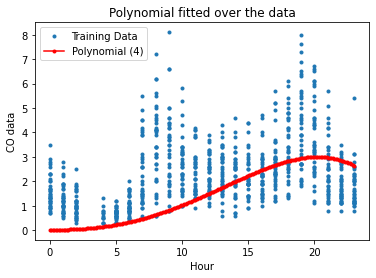

In [646]:
# This function plots the polymonial model over air qulaity data 
def plot_data(X, T, W, steps):
    # Make a uniformly spaced X data to get polynomial line.
    # without it dots will be ploted. Or if line is ploted, it will jump over places.
    Xtest = np.linspace(0, 23, steps).reshape(-1, 1)
    plt.plot(X, T, '.', label='Training Data')
    plt.plot(Xtest, polynomial_model(Xtest, W), 'r.-', label=f'Polynomial ({n_powers-1})')
    plt.xlabel('Hour')
    plt.ylabel('CO data')
    plt.title("Polynomial fitted over the data")
    plt.legend();

# Call function to plot data
plot_data(X, T, W, 200)



###  Error (RMSE) Vs Iterations 
Following is the error sequence plot. The values of RMSE can be observed druing various epochs form the plot

Initially RMSE is high and it bounces up and down as we go through the iteration.
Finally it settles at minimum values which is close to zero.

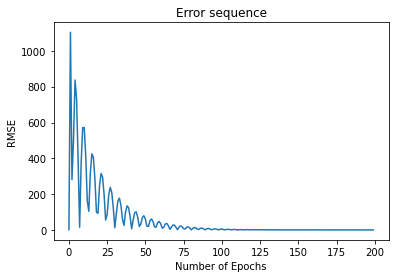

In [647]:
plt.plot(error_sequence)
plt.title("Error sequence")
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

### Weights Vs number of steps
Following is the plot showing the variation of Weights (5 or polynomial with 4th power of X).
We can see that the Ws starts from zero and they vary with steps (iterations). The GDA gives the optimum weights for which RMSE of the polynomial model to the data is minimum.

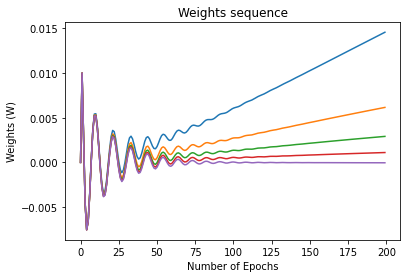

In [648]:
plt.plot(W_sequence)
plt.title("Weights sequence")
plt.xlabel('Number of Epochs')
plt.ylabel('Weights (W)');

### Polynomial model
#### Change number of weights and number of steps
Now apply model for

npowers = 3 and steps = 100.

The RMSE is now 1.3. We can see from the plot that the model goes through the data.

Adam:  Error is 1.28   W is 0.68, 0.27, -0.01


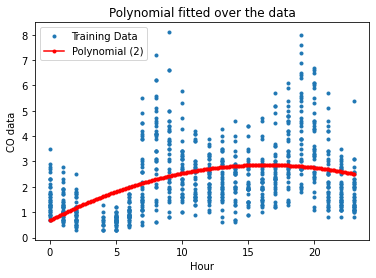

In [649]:
n_powers = 3
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01     # learning rate
n_steps = 200  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}, {:.2f}'.format(
                            rmse(polynomial_model, X, T, W), W[0,0], W[1,0], W[2,0]))
# Call the function to plot
plot_data(X, T, W, 200)

### Polynomial model
#### Change number of weights and number of steps
Now apply the model for:

npowers = 4 and steps = 100.

The RMSE is 1.56

Adam:  Error is 1.56   W is 0.09, 0.03, 0.01, -0.00


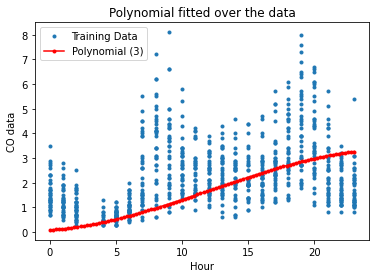

In [650]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01     # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(
                            rmse(polynomial_model, X, T, W), W[0,0], W[1,0], W[2,0], W[3,0]))

# Call the function to plot
plot_data(X, T, W, 100)


### Polynomial model
#### Change number of weights and number of steps

Now apply model for

npowers = 4 and steps = 250. The RMSE of fit is 1.33


Adam:  Error is 1.33   W is 0.20, 0.07, 0.02, -0.00


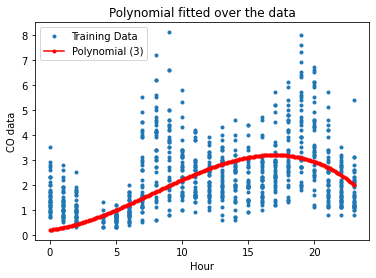

In [651]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01     # learning rate
n_steps = 250  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(
                            rmse(polynomial_model, X, T, W), W[0,0], W[1,0], W[2,0], W[3,0]))

# Call the function to plot
plot_data(X, T, W, 250)

### Polynomial model
Now apply model for

npowers = 5 ande steps = 300. The RMSE of fit is 1.51

The model seems to fit the data well. The error is minimum and looking at the polt we can say that the model
represent the given data. The extreme points of the data are however not taken into account by the fitted model.

In this plot a linear model for the data is also ploted on top of the data. The green line represents the linear model. The weights(slope) is optimized by using GDA function. We can compare how well the data fits by observing both linear and polynomial models to the data


Adam Poly:  Error is 1.51   W is 0.02, 0.01, 0.00, 0.00, -0.00
Adam Linear:  Error is 1.51   W is 0.02, 0.01


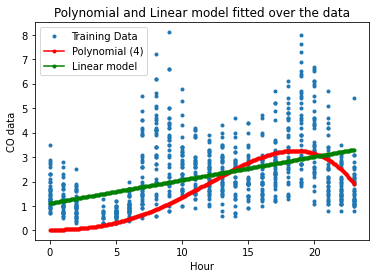

In [652]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights

# Initial weights for linear model
n_powers_lin = 2
W_lin = np.zeros((n_powers_lin, 1))
             
rho = 0.01     # learning rate
n_steps = 300  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Adam Poly:  Error is {:.2f}   W is {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(
                           rmse(polynomial_model, X, T, W), W[0,0], W[1,0], W[2,0], W[3,0], W[4,0]))


# Call adams for linear model

W_lin, error_sequence_lin, W_sequence_lin = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W_lin, 
                                                      rho, n_steps)
print('Adam Linear:  Error is {:.2f}   W is {:.2f}, {:.2f}'.format(
                           rmse(polynomial_model, X, T, W), W[0,0], W[1,0]))

# Plot the data and model

Xtest = np.linspace(0, 23, 300).reshape(-1, 1)
plt.plot(X, T, '.', label='Training Data')
plt.plot(Xtest, polynomial_model(Xtest, W), 'r.-', label=f'Polynomial ({n_powers-1})')
plt.plot(Xtest, polynomial_model(Xtest, W_lin), 'g.-', label='Linear model')
plt.xlabel('Hour')
plt.ylabel('CO data')
plt.title("Polynomial and Linear model fitted over the data")
plt.legend();




### Conclusion
In this assignment, the air quality data was downloaded from given link. From air quality data,
the variation of carbon mono-oxide data with hours of day was investigated. A polynomial model for the data was
derived. The model was fitted to the data by obtaining the optimal weights using Gradient Descent Adams function.
The number of iterations and number of weights to the polynomial model were varied. By doing so, we can observe if the model is fitted well or not by observing the plots and the RMSE.

By adjusting the iterations number of the weights to the model, the best polynomial model for the data can be selected.

For this assignment polynomial model for CO data was obtained. Similar process can be applied to other parameter of the air quality data and respective model of the data can be obtained.


# Air Quality Data

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  When done correctly, `X` and `T` should both have shape `(827, 1)`.  Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

Now apply the Adam optimization function to fit a polynomial to this data.  Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [653]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Bhatta-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 1))
    r